Atalov S. (TSI AUCA)

Introduction to Machine Learning

---

# Gradient Descent for Linear Regression

<div>
    <img src = "https://alykhantejani.github.io/images/gradient_descent_line_graph.gif" width = 700>
</div>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = np.array([[ 952.   ,  271.5  ],
                   [1244.   ,  300.   ],
                   [1947.   ,  509.8  ],
                   [1725.   ,  394.   ],
                   [1959.   ,  540.   ],
                   [1314.   ,  415.   ],
                   [ 864.   ,  230.   ],
                   [1836.   ,  560.   ],
                   [1026.   ,  294.   ],
                   [ 788.   ,  200.   ],
                   [1200.   ,  302.   ],
                   [1557.   ,  468.   ],
                   [1430.   ,  374.2  ],
                   [1220.   ,  388.   ],
                   [1092.   ,  282.   ],
                   [ 848.   ,  311.8  ],
                   [1682.   ,  401.   ],
                   ])

In [11]:
# Load our data set
x = data[:, 0]
y = data[:, 1]

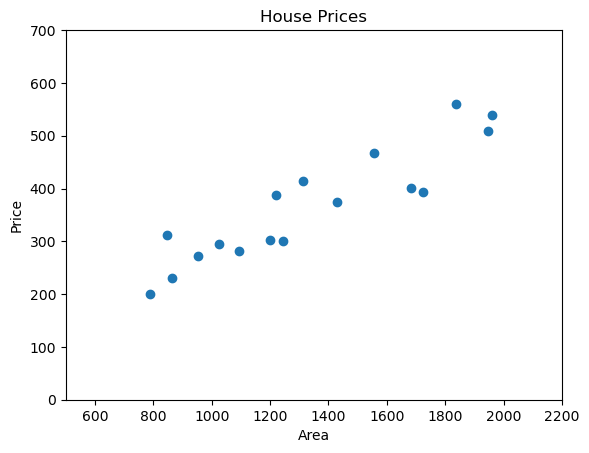

In [12]:
plt.scatter(x, y);
plt.title('House Prices');
plt.xlabel('Area');
plt.ylabel('Price');
plt.xlim(500, 2200);
plt.ylim(0, 700);

### Compute_Cost


### Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [14]:
#Function to calculate the cost

def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        y_hat = w * x[i] + b
        cost += (y_hat - y[i]) ** 2
    
    cost /= (2 * m)
    
    return cost

In [15]:
compute_cost(x, y, w=10, b=100)

92333904.32852942

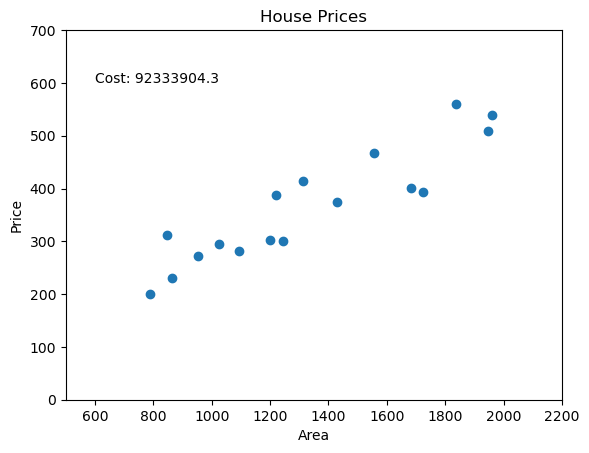

In [16]:
# Change w, b and look and cost function
w = 10
b = 100


y_hat = w * x + b
cost = round(compute_cost(x, y, w, b), 1)



plt.scatter(x, y);
plt.plot(x, y_hat, c = 'r')
plt.title('House Prices');
plt.xlabel('Area');
plt.ylabel('Price');
plt.xlim(500, 2200);
plt.ylim(0, 700);
plt.text(x=600,y=600,s=f'Cost: {cost}')
plt.show()

## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

---
## TASK 

<div>
    <img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6zNCAJfqBdGOQYY9PKd1vDfNpw-50jzVf0w&usqp=CAU">
</div>

In [32]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
        
    dj_dw = 0
    dj_db = 0
    
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_scaled = (x - x_mean) / x_std
    
    for i in range(x.shape[0]):  
        y_hat = w * x_scaled[i] + b 
        dj_dw += 2 * (y_hat - y[i]) * x_scaled[i]  
        dj_db += 2 * (y_hat - y[i])         
    
    dj_dw /= x.shape[0]
    dj_db /= x.shape[0]
    
    return dj_dw, dj_db


In [37]:
w = 1020
b = 1000

compute_gradient(x, y, w, b)

(1850.3246526792068, 1265.7294117647066)

###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [6]:
import math

In [19]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w, b)     

        # Update Parameters using the gradient descent update rule
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        J_history.append(compute_cost(x, y, w, b))
        
        # Save parameters [w, b] at each iteration
        p_history.append([w, b])
 
    return w, b, J_history, p_history

In [38]:
# initialize parameters
w_init = 10
b_init = 10


# some gradient descent settings
iterations = 100000
alpha = 0.000001


# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, alpha, iterations)


print(f"(w,b) found by gradient descent: ({w_final:.4f},{b_final:.4f})")

(w,b) found by gradient descent: (25.3785,74.7377)


### Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

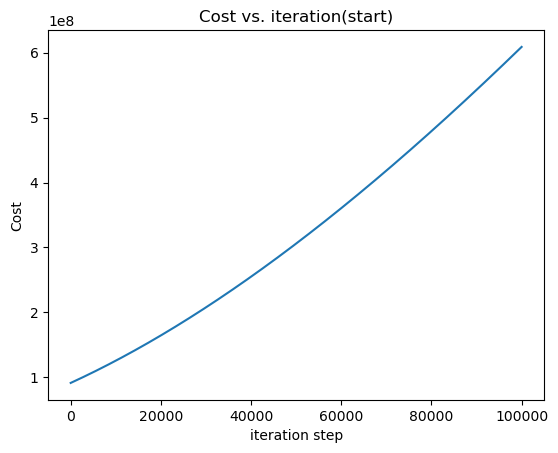

In [39]:
# plot cost versus iteration  

plt.plot(J_hist)

plt.title("Cost vs. iteration(start)");  
plt.ylabel('Cost');  
plt.xlabel('iteration step');
plt.show()

---
### Additional Explanation of Gradient Descent

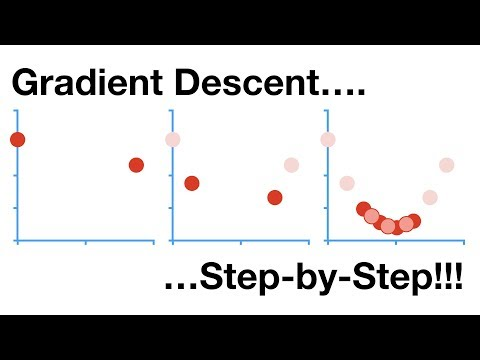

In [40]:
from IPython.display import YouTubeVideo

YouTubeVideo('sDv4f4s2SB8', width=800, height=300)